# Importing all the Libraries

In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import category_encoders as ce
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from dmba import regressionSummary
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from mord import LogisticIT
from dmba import classificationSummary, regressionSummary
%matplotlib inline
import matplotlib.pylab as plt

# Reading Data For classification 

In [108]:
nyc_jobs_df = pd.read_csv('NYC_Jobs.csv')
nyc_jobs_df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,424339,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Triage Nurse, Bureau of Public Health Clinics",PUBLIC HEALTH NURSE,Competitive-1,51011,03,Health,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please ...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2022,NaN,04/05/2022,04/12/2022
1,379094,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT DEVELOPER (APPLICATIONS),CERT IT DEVELOPER (APP),Competitive-1,13643,02,"Technology, Data & Innovation",...,NaN,"TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...",NaN,NaN,NaN,New York City Residency is not required for th...,01/07/2019,NaN,01/07/2019,04/12/2022
2,520417,NYC HOUSING AUTHORITY,External,1,Chief of Settlement,EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Legal Affairs,...,1. Resume and cover letter must also include ...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,03/28/2022,NaN,03/28/2022,04/12/2022
3,233549,NYC EMPLOYEES RETIREMENT SYS,External,1,"CERTIFIED IT ADMINISTRATOR (LAN/WAN), LEVEL 4",CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,04,Information Technology & Telecommunications,...,NaN,Click the 'apply now' button to apply. Please...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2016,NaN,03/01/2016,04/12/2022
4,510256,HUMAN RIGHTS COMMISSION,External,5,Associate Human Rights Specialist,ASSOCIATE HUMAN RIGHTS SPECIAL,Competitive-1,55038,01,Constituent Services & Community Programs,...,NaN,For City employees: Go to Employee Self-Servic...,": DAY, 9-5; ON OCCASION, CANDIDATES MAY BE REQ...","22 Reade St, Ny",NaN,New York City residency is generally required ...,12/16/2021,NaN,12/16/2021,04/12/2022


In [109]:
nyc_jobs_df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

# Pre Processing the data

In [110]:
nyc_jobs_df = nyc_jobs_df.drop(columns=['Job ID','Business Title','Title Classification','Title Code No','Job Description','Minimum Qual Requirements',
                                        'Additional Information','To Apply','Hours/Shift','Work Location 1','Recruitment Contact','Posting Date',
                                        'Post Until', 'Posting Updated', 'Process Date'])

In [111]:
nyc_jobs_df.shape

(3773, 15)

In [112]:
nyc_jobs_df.head()

,Agency,Posting Type,# Of Positions,Civil Service Title,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Preferred Skills,Residency Requirement
0,DEPT OF HEALTH/MENTAL HYGIENE,External,1,PUBLIC HEALTH NURSE,03,Health,F,Experienced (non-manager),84252.0,84252.0,Annual,NYC - All Boroughs,PHC Administration,NaN,New York City Residency is not required for th...
1,NYC EMPLOYEES RETIREMENT SYS,External,1,CERT IT DEVELOPER (APP),02,"Technology, Data & Innovation",F,Experienced (non-manager),82884.0,116391.0,Annual,"335 Adams Street, Brooklyn Ny",Executive Management,Â·\tExperience with testing /deployment tools ...,New York City Residency is not required for th...
2,NYC HOUSING AUTHORITY,External,1,EXECUTIVE AGENCY COUNSEL,M2,Legal Affairs,F,Manager,105000.0,125000.0,Annual,Law-Tort Division,Law Dept-Litigation,1. Thorough knowledge of tort substantive and...,NYCHA has no residency requirements.
3,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT ADMINISTRATOR (LA,04,Information Technology & Telecommunications,F,Experienced (non-manager),87203.0,131623.0,Annual,"335 Adams Street, Brooklyn Ny",Executive Management,"Minimum 5 years of experience planning, design...",New York City Residency is not required for th...
4,HUMAN RIGHTS COMMISSION,External,5,ASSOCIATE HUMAN RIGHTS SPECIAL,01,Constituent Services & Community Programs,F,Experienced (non-manager),58449.0,67216.0,Annual,"22 Reade St, Ny",Comm.Rel.Bureau-Central,â¢\tStrong oral and written communication ski...,New York City residency is generally required ...


In [113]:
for c in nyc_jobs_df.columns:
    print(c)
    print(nyc_jobs_df[c].describe())
    print()

Agency
count                               3773
unique                                56
top       DEPT OF ENVIRONMENT PROTECTION
freq                                 588
Name: Agency, dtype: object

Posting Type
count         3773
unique           2
top       Internal
freq          2139
Name: Posting Type, dtype: object

# Of Positions
count    3773.000000
mean        2.614365
std         9.781737
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       250.000000
Name: # Of Positions, dtype: float64

Civil Service Title
count                      3773
unique                      349
top       SUMMER COLLEGE INTERN
freq                        240
Name: Civil Service Title, dtype: object

Level
count     3773
unique      17
top         00
freq      1588
Name: Level, dtype: object

Job Category
count                                      3771
unique                                      133
top       Engineering, Architecture, & Planning
freq          

In [114]:
nyc_jobs_df.columns = [c.strip().replace(' ','_') for c in nyc_jobs_df.columns]
nyc_jobs_df = nyc_jobs_df.rename(columns={
    'Full-Time/Part-Time_indicator':'Full_Time_Part_Time_indicator', 
    'Division/Work_Unit':'Division_Work_Unit'})
print(nyc_jobs_df.columns)

Index(['Agency', 'Posting_Type', '#_Of_Positions', 'Civil_Service_Title',
       'Level', 'Job_Category', 'Full_Time_Part_Time_indicator',
       'Career_Level', 'Salary_Range_From', 'Salary_Range_To',
       'Salary_Frequency', 'Work_Location', 'Division_Work_Unit',
       'Preferred_Skills', 'Residency_Requirement'],
      dtype='object')


In [115]:
dataTypesDict = dict(nyc_jobs_df.dtypes)
for k in dataTypesDict.keys():
    if str(dataTypesDict[k]) == 'object':
        print(k)

Agency
Posting_Type
Civil_Service_Title
Level
Job_Category
Full_Time_Part_Time_indicator
Career_Level
Salary_Frequency
Work_Location
Division_Work_Unit
Preferred_Skills
Residency_Requirement


In [116]:
nyc_jobs_df.Agency = nyc_jobs_df.Agency.astype('category')
nyc_jobs_df.Posting_Type = nyc_jobs_df.Posting_Type.astype('category')
nyc_jobs_df.Civil_Service_Title = nyc_jobs_df.Civil_Service_Title.astype('category')
nyc_jobs_df.Level = nyc_jobs_df.Level.astype('category')
nyc_jobs_df.Job_Category = nyc_jobs_df.Job_Category.astype('category')
nyc_jobs_df.Full_Time_Part_Time_indicator = nyc_jobs_df.Full_Time_Part_Time_indicator.astype('category')
nyc_jobs_df.Career_Level = nyc_jobs_df.Career_Level.astype('category')
nyc_jobs_df.Salary_Frequency = nyc_jobs_df.Salary_Frequency.astype('category')
nyc_jobs_df.Work_Location = nyc_jobs_df.Work_Location.astype('category')
nyc_jobs_df.Division_Work_Unit = nyc_jobs_df.Division_Work_Unit.astype('category')
nyc_jobs_df.Preferred_Skills = nyc_jobs_df.Preferred_Skills.astype('category')
nyc_jobs_df.Residency_Requirement = nyc_jobs_df.Residency_Requirement.astype('category')

In [117]:
nyc_jobs_df.dtypes

Agency                           category
Posting_Type                     category
#_Of_Positions                      int64
Civil_Service_Title              category
Level                            category
Job_Category                     category
Full_Time_Part_Time_indicator    category
Career_Level                     category
Salary_Range_From                 float64
Salary_Range_To                   float64
Salary_Frequency                 category
Work_Location                    category
Division_Work_Unit               category
Preferred_Skills                 category
Residency_Requirement            category
dtype: object

In [118]:
nyc_jobs_df = nyc_jobs_df.dropna()
nyc_jobs_df.shape

(3231, 15)

In [119]:
predictors = list(nyc_jobs_df.drop(columns=['Career_Level']).columns)
outcome = 'Career_Level'

In [120]:
predictors

['Agency',
 'Posting_Type',
 '#_Of_Positions',
 'Civil_Service_Title',
 'Level',
 'Job_Category',
 'Full_Time_Part_Time_indicator',
 'Salary_Range_From',
 'Salary_Range_To',
 'Salary_Frequency',
 'Work_Location',
 'Division_Work_Unit',
 'Preferred_Skills',
 'Residency_Requirement']

In [121]:
outcome

'Career_Level'

In [122]:
x = nyc_jobs_df[predictors]
y = nyc_jobs_df[outcome]

In [123]:
encoder1 = ce.BaseNEncoder(cols=['Agency','Posting_Type','Civil_Service_Title','Level','Job_Category',
                                'Full_Time_Part_Time_indicator','Salary_Frequency','Work_Location',
                                'Division_Work_Unit','Preferred_Skills','Residency_Requirement']
                          ,return_df=True,base=12)
x = encoder1.fit_transform(x)

encoder2 = ce.OrdinalEncoder(cols=['Career_Level'],return_df=True,
                           mapping=[{'col':'Career_Level',
'mapping':{'Student':1,'Entry-Level':2,'Experienced (non-manager)':3,'Manager':4,'Executive':5}}])
y = encoder2.fit_transform(y)

In [124]:
x

,Agency_0,Agency_1,Posting_Type_0,#_Of_Positions,Civil_Service_Title_0,Civil_Service_Title_1,Civil_Service_Title_2,Level_0,Level_1,Job_Category_0,...,Work_Location_1,Work_Location_2,Division_Work_Unit_0,Division_Work_Unit_1,Division_Work_Unit_2,Preferred_Skills_0,Preferred_Skills_1,Preferred_Skills_2,Residency_Requirement_0,Residency_Requirement_1
1,0,1,1,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,0,2,1,1,0,0,2,0,2,0,...,0,2,0,0,2,0,0,2,0,2
3,0,1,1,1,0,0,3,0,3,0,...,0,1,0,0,1,0,0,3,0,1
4,0,3,1,5,0,0,4,0,4,0,...,0,3,0,0,3,0,0,4,0,3
5,0,4,2,1,0,0,5,0,5,0,...,0,4,0,0,4,0,0,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,1,0,2,1,0,1,4,0,4,1,...,1,1,0,3,0,0,3,2,0,3
3769,0,7,2,1,0,0,8,0,5,0,...,0,7,2,3,1,3,3,1,0,3
3770,3,0,2,1,0,6,11,0,5,0,...,4,4,4,3,5,7,11,7,0,7
3771,1,7,2,2,0,2,8,0,4,0,...,4,6,4,2,11,7,10,3,0,3


In [125]:
y.Career_Level = y.Career_Level.astype('int64')
y = y.squeeze()

In [126]:
y

1       3
2       4
3       3
4       3
5       1
       ..
3767    1
3769    3
3770    3
3771    3
3772    2
Name: Career_Level, Length: 3231, dtype: int64

In [127]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

# Classification 
 
- For our first focus of study we are going to apply classification modeling with data mining techniques for below for models.
1. Logistic Model
2. Neural Network
3. K-NN
4. Decision tree

# 1.Logistic model classification

In [128]:
logit_ord = LogisticIT(alpha=0)
logit_ord.fit(train_x,train_y)

print('Intercept: ',np.round(logit_ord.theta_, 3))
print()
print('Coefficient: ',np.round(logit_ord.coef_, 3))

Intercept:  [0.382 1.316 6.307 9.158]

Coefficient:  [-0.094  0.049 -0.503  0.012  0.519  0.061 -0.02   0.116  0.09   0.001
  0.088 -0.495  0.     0.    -0.59   0.069  0.032  0.044  0.22  -0.046
  0.077 -0.051  0.005  0.007 -0.44   0.031]


In [129]:
pred_cl = logit_ord.predict(valid_x)
pred_cl_proba = np.round(logit_ord.predict_proba(valid_x), 4)

logistic_result = pd.DataFrame({
    'Actual': valid_y,
    'Classification': pred_cl,
    'P(1)': [P[0] for P in pred_cl_proba],
    'P(2)': [P[1] for P in pred_cl_proba],
    'P(3)': [P[2] for P in pred_cl_proba],
    'P(4)': [P[3] for P in pred_cl_proba],
    'P(5)': [P[4] for P in pred_cl_proba]
})

logistic_result

,Actual,Classification,P(1),P(2),P(3),P(4),P(5)
1910,3,3,0.0512,0.0695,0.8321,0.0443,0.0029
2020,3,3,0.0618,0.0817,0.8175,0.0367,0.0023
3394,1,1,0.7890,0.1159,0.0944,0.0007,0.0000
2456,3,4,0.0020,0.0031,0.4239,0.4996,0.0714
2793,2,3,0.0597,0.0794,0.8205,0.0379,0.0024
...,...,...,...,...,...,...,...
2,4,3,0.0090,0.0135,0.7494,0.2114,0.0168
763,2,3,0.0789,0.1001,0.7908,0.0285,0.0018
447,3,3,0.0662,0.0866,0.8109,0.0342,0.0022
1918,3,3,0.0228,0.0332,0.8411,0.0964,0.0066


In [130]:
print('Training Pratition')
classificationSummary(train_y,logit_ord.predict(train_x))
print()
print('Valid Pratition')
classificationSummary(valid_y,logit_ord.predict(valid_x))

Training Pratition
Confusion Matrix (Accuracy 0.7539)

       Prediction
Actual    0    1    2    3    4
     0  213    4    0    0    0
     1   31   14  153    0    0
     2   47   24 1083   39    1
     3    0    0  140  129    8
     4    0    0    8   22   22

Valid Pratition
Confusion Matrix (Accuracy 0.7456)

       Prediction
Actual   0   1   2   3   4
     0 139   2   0   0   0
     1  25  10 110   0   0
     2  16  15 734  36   2
     3   0   0 101  69   7
     4   0   0   6   9  12


# 2.Neural network for classification

In [131]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x_norm = scaler.transform(train_x)
valid_x_norm = scaler.transform(valid_x)

In [132]:
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_x_norm, train_y)


print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8153
Best parameter:  {'hidden_layer_sizes': 18}


In [133]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(18), activation='logistic', 
                    solver='lbfgs', max_iter=10000, random_state=1)

nn_classifier.fit(train_x, train_y)

print('Model Intercepts')
print(nn_classifier.intercepts_)
print()
print('Model Weights')
print(nn_classifier.coefs_)

Model Intercepts
[array([ 0.0112501 , -0.077829  ,  0.21347905,  0.02676102,  0.02976525,
       -0.01802176,  0.18627502, -0.22422356,  0.08271139,  0.15701476,
       -0.22845201, -0.01288953, -0.06700024,  0.039704  , -0.16520908,
        0.02226028,  0.0551548 ,  0.02566316]), array([-0.34922384, -0.04822261,  0.36444756,  0.20962529, -0.05004008])]

Model Weights
[array([[-3.74802039e-02,  8.57013291e-02, -1.78043619e-01,
         7.17321829e-02, -8.98994944e-02, -1.92752655e-01,
        -1.33780778e-01, -8.27410358e-02, -5.25845056e-02,
        -1.00609914e-02, -5.08942545e-02,  6.65421179e-02,
        -1.10200538e-01,  8.72682642e-02, -6.24682938e-01,
        -2.24495964e-02,  6.40785169e-02, -3.75037247e-02],
       [-1.69307893e-01, -1.38820920e-01,  2.92576369e-01,
        -5.58077970e-02,  4.23302864e-02, -3.30659346e-02,
         1.54730456e-01,  2.42505449e-02, -2.19605847e-01,
        -1.85499084e-01, -2.09139945e-01,  1.11866241e-01,
        -2.85542708e-02, -2.31553605e

In [134]:
nn_pred_cl = nn_classifier.predict(valid_x)
nn_pred_cl_proba = np.round(nn_classifier.predict_proba(valid_x), 4)

nn_result = pd.DataFrame({
    'Actual': valid_y,
    'Classification': nn_pred_cl,
    'P(1)': [P[0] for P in nn_pred_cl_proba],
    'P(2)': [P[1] for P in nn_pred_cl_proba],
    'P(3)': [P[2] for P in nn_pred_cl_proba],
    'P(4)': [P[3] for P in nn_pred_cl_proba],
    'P(5)': [P[4] for P in nn_pred_cl_proba]
})

nn_result

,Actual,Classification,P(1),P(2),P(3),P(4),P(5)
1910,3,3,0.0000,0.1135,0.8097,0.0584,0.0184
2020,3,3,0.0000,0.1135,0.8097,0.0584,0.0184
3394,1,1,0.9862,0.0030,0.0097,0.0006,0.0005
2456,3,4,0.0040,0.0171,0.2648,0.6771,0.0370
2793,2,3,0.0000,0.1135,0.8097,0.0584,0.0184
...,...,...,...,...,...,...,...
2,4,3,0.0000,0.1135,0.8097,0.0584,0.0184
763,2,4,0.0003,0.0423,0.3711,0.4925,0.0939
447,3,3,0.0000,0.1135,0.8097,0.0584,0.0184
1918,3,3,0.0000,0.1135,0.8097,0.0584,0.0184


In [135]:
print('Training Pratition')
classificationSummary(train_y,nn_classifier.predict(train_x))
print()
print('Valid Pratition')
classificationSummary(valid_y,nn_classifier.predict(valid_x))

Training Pratition
Confusion Matrix (Accuracy 0.7616)

       Prediction
Actual    0    1    2    3    4
     0  207    2    8    0    0
     1   10   25  162    1    0
     2    9    3 1099   83    0
     3    0    0  132  145    0
     4    0    0   25   27    0

Valid Pratition
Confusion Matrix (Accuracy 0.7548)

       Prediction
Actual   0   1   2   3   4
     0 137   4   0   0   0
     1   5  19 120   1   0
     2   7   1 723  72   0
     3   0   0  80  97   0
     4   0   0  12  15   0


# 3.KNN

In [30]:
kNN_scaler = StandardScaler()

In [31]:
train_x.dtypes

Agency_0                             int64
Agency_1                             int64
Posting_Type_0                       int64
#_Of_Positions                       int64
Civil_Service_Title_0                int64
Civil_Service_Title_1                int64
Civil_Service_Title_2                int64
Level_0                              int64
Level_1                              int64
Job_Category_0                       int64
Job_Category_1                       int64
Full_Time_Part_Time_indicator_0      int64
Salary_Range_From                  float64
Salary_Range_To                    float64
Salary_Frequency_0                   int64
Work_Location_0                      int64
Work_Location_1                      int64
Work_Location_2                      int64
Division_Work_Unit_0                 int64
Division_Work_Unit_1                 int64
Division_Work_Unit_2                 int64
Preferred_Skills_0                   int64
Preferred_Skills_1                   int64
Preferred_S

In [32]:
kNN_scaler.fit(train_x)  

'''
# Transform the full data set into standardized (normalized) data set. 
kNN_nycNorm = pd.concat([pd.DataFrame(kNN_scaler.transform(train_x), 
                                    columns=['zAgency_0', 'zAgency_1', 'zPosting_Type_0', 'z#_Of_Positions',
       'zCivil_Service_Title_0', 'zCivil_Service_Title_1',
       'zCivil_Service_Title_2', 'zLevel_0', 'zLevel_1', 'zJob_Category_0',
       'zJob_Category_1', 'zFull_Time_Part_Time_indicator_0',
       'zSalary_Range_From', 'zSalary_Range_To', 'zSalary_Frequency_0',
       'zWork_Location_0', 'zWork_Location_1', 'zWork_Location_2',
       'zDivision_Work_Unit_0', 'zDivision_Work_Unit_1', 'zDivision_Work_Unit_2',
       'zPreferred_Skills_0', 'zPreferred_Skills_1', 'zPreferred_Skills_2',
       'zResidency_Requirement_0', 'zResidency_Requirement_1']),
                       valid_x], axis=1)
print('Standardized (Normalized) Values of Riding nycs Data Set')
print()
print(kNN_nycNorm.head())
valid_x.dtypes
'''

"\n# Transform the full data set into standardized (normalized) data set. \nkNN_nycNorm = pd.concat([pd.DataFrame(kNN_scaler.transform(train_x), \n                                    columns=['zAgency_0', 'zAgency_1', 'zPosting_Type_0', 'z#_Of_Positions',\n       'zCivil_Service_Title_0', 'zCivil_Service_Title_1',\n       'zCivil_Service_Title_2', 'zLevel_0', 'zLevel_1', 'zJob_Category_0',\n       'zJob_Category_1', 'zFull_Time_Part_Time_indicator_0',\n       'zSalary_Range_From', 'zSalary_Range_To', 'zSalary_Frequency_0',\n       'zWork_Location_0', 'zWork_Location_1', 'zWork_Location_2',\n       'zDivision_Work_Unit_0', 'zDivision_Work_Unit_1', 'zDivision_Work_Unit_2',\n       'zPreferred_Skills_0', 'zPreferred_Skills_1', 'zPreferred_Skills_2',\n       'zResidency_Requirement_0', 'zResidency_Requirement_1']),\n                       valid_x], axis=1)\nprint('Standardized (Normalized) Values of Riding nycs Data Set')\nprint()\nprint(kNN_nycNorm.head())\nvalid_x.dtypes\n"

In [33]:
kNN_trainNorm_x = kNN_scaler.transform(train_x)
kNN_validNorm_x = kNN_scaler.transform(valid_x)

#kNN_trainNorm_y = kNN_nycNorm.iloc[train_y.index]
#kNN_validNorm_y = kNN_nycNorm.iloc[valid_y.index]

In [34]:
train_y

3296    3
3132    3
887     3
1951    3
3352    3
       ..
3232    3
1078    1
1301    4
276     3
1265    4
Name: Career_Level, Length: 1938, dtype: int64

In [35]:
kNN = KNeighborsClassifier(n_neighbors=3).fit(kNN_trainNorm_x, train_y)



In [36]:
results = []
for k in range(1, 15):
    # Train knn classifier using training partition.
    kNN = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(valid_y, kNN.predict(valid_x))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

     k  Accuracy Score
0    1        0.907966
1    2        0.832947
2    3        0.802011
3    4        0.808971
4    5        0.819799
5    6        0.808971
6    7        0.819799
7    8        0.808198
8    9        0.812065
9   10        0.810518
10  11        0.808198
11  12        0.806651
12  13        0.798917
13  14        0.795824


In [37]:
#kNN_nyc_x = x
#kNN_nyc_y = kNorm['Ownership']

# Develop k-NN classifier for the entire data set, k = 4.
kNN = KNeighborsClassifier(n_neighbors=1).fit(x, y)

# Display new record's classification result, distances and 
# indices, and nearest neighbors. 
kNN_train_pred = kNN.predict(train_x)


kNN_valid_pred = kNN.predict(valid_x)

c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
print('Accuracy Measures for Training Set')
classificationSummary(train_y, kNN_train_pred)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set')
classificationSummary(valid_y, kNN_valid_pred)

Accuracy Measures for Training Set
Confusion Matrix (Accuracy 0.9985)

       Prediction
Actual    0    1    2    3    4
     0  217    0    0    0    0
     1    0  197    1    0    0
     2    0    0 1193    1    0
     3    0    0    1  276    0
     4    0    0    0    0   52

Accuracy Measures for Validation Set
Confusion Matrix (Accuracy 0.9992)

       Prediction
Actual   0   1   2   3   4
     0 141   0   0   0   0
     1   0 144   1   0   0
     2   0   0 803   0   0
     3   0   0   0 177   0
     4   0   0   0   0  27


# 4.DecisionTree for classification

In [39]:
tree_x = nyc_jobs_df.drop(columns=['Career_Level'])
tree_y = nyc_jobs_df['Career_Level']

classTree = DecisionTreeClassifier(random_state=0)

# Fit Riding Mower data frame (Income and Lot_Size) into the tree. 
# Column 'Ownership' as outcome is not used for the fitting algorithm. 
classTree.fit(x, y)
'''
print("Classes: {}".format(', '.join(classTree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'classTree.classes_',
# i.e., the first number is 'Nonowners' and the second number 'Owners'.
print()
print('Full Classification Tree after All Splits')
plotDecisionTree(classTree, feature_names=x.columns[:], class_names=classTree.classes_)
'''

'\nprint("Classes: {}".format(\', \'.join(classTree.classes_)))\n\n# Use plotDecisionTree() function to visualize the classfication tree.\n# The order of the \'value\' in the boxes is the same as \'classTree.classes_\',\n# i.e., the first number is \'Nonowners\' and the second number \'Owners\'.\nprint()\nprint(\'Full Classification Tree after All Splits\')\nplotDecisionTree(classTree, feature_names=x.columns[:], class_names=classTree.classes_)\n'

In [40]:
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_x, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
#plotDecisionTree(smallClassTree, feature_names=train_x.columns)

Small Classification Tree with Control Parameters


In [41]:
print('Training Partition for Smaller Tree')
classificationSummary(train_y, smallClassTree.predict(train_x))

print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, smallClassTree.predict(valid_x))

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8313)

       Prediction
Actual    0    1    2    3    4
     0  215    1    1    0    0
     1   13   63  120    2    0
     2   15   10 1147   22    0
     3    0    6   85  186    0
     4    0    0   10   42    0

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8183)

       Prediction
Actual   0   1   2   3   4
     0 138   3   0   0   0
     1   6  45  94   0   0
     2   6   4 769  24   0
     3   0   8  63 106   0
     4   0   0   5  22   0


In [42]:
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_x, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8504
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [43]:
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'min_samples_split': list(range(10, 30)),
}

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)

print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8612
Improved parameters:  {'max_depth': 18, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


In [44]:
bestClassTree = gridSearch.best_estimator_
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 161


In [45]:
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_x))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_x))

Training Partition
Confusion Matrix (Accuracy 0.9365)

       Prediction
Actual    0    1    2    3    4
     0  215    1    1    0    0
     1    2  156   39    1    0
     2    6   14 1155   16    3
     3    0    1   25  247    4
     4    0    0    5    5   42

Validation Partition
Confusion Matrix (Accuracy 0.8654)

       Prediction
Actual   0   1   2   3   4
     0 134   5   2   0   0
     1   1  99  44   1   0
     2   2  29 730  34   8
     3   0   1  33 138   5
     4   0   0   4   5  18


# Reading and pre processing data for Numerical prediction

In [46]:
nyc_jobs_df = pd.read_csv('NYC_Jobs.csv')
nyc_jobs_df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,424339,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Triage Nurse, Bureau of Public Health Clinics",PUBLIC HEALTH NURSE,Competitive-1,51011,03,Health,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please ...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2022,NaN,04/05/2022,04/12/2022
1,379094,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT DEVELOPER (APPLICATIONS),CERT IT DEVELOPER (APP),Competitive-1,13643,02,"Technology, Data & Innovation",...,NaN,"TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...",NaN,NaN,NaN,New York City Residency is not required for th...,01/07/2019,NaN,01/07/2019,04/12/2022
2,520417,NYC HOUSING AUTHORITY,External,1,Chief of Settlement,EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Legal Affairs,...,1. Resume and cover letter must also include ...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,03/28/2022,NaN,03/28/2022,04/12/2022
3,233549,NYC EMPLOYEES RETIREMENT SYS,External,1,"CERTIFIED IT ADMINISTRATOR (LAN/WAN), LEVEL 4",CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,04,Information Technology & Telecommunications,...,NaN,Click the 'apply now' button to apply. Please...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2016,NaN,03/01/2016,04/12/2022
4,510256,HUMAN RIGHTS COMMISSION,External,5,Associate Human Rights Specialist,ASSOCIATE HUMAN RIGHTS SPECIAL,Competitive-1,55038,01,Constituent Services & Community Programs,...,NaN,For City employees: Go to Employee Self-Servic...,": DAY, 9-5; ON OCCASION, CANDIDATES MAY BE REQ...","22 Reade St, Ny",NaN,New York City residency is generally required ...,12/16/2021,NaN,12/16/2021,04/12/2022


In [47]:
#number of rows and columns in original dataframe
nyc_jobs_df.shape

(3773, 30)

In [48]:
print("Column names in dataframe")
nyc_jobs_df.columns

Column names in dataframe


Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

# Pre processing for numeric prediction

In [49]:
#droping unncessary columns
nyc_jobs_df = nyc_jobs_df.drop(columns=['Job ID','Business Title','Title Classification','Title Code No','Job Description','Minimum Qual Requirements',
                                        'Additional Information','To Apply','Hours/Shift','Work Location 1','Recruitment Contact','Posting Date',
                                        'Post Until', 'Posting Updated', 'Process Date'])

In [50]:
# Updated number of rows and columns
nyc_jobs_df.shape

(3773, 15)

In [51]:
nyc_jobs_df.head()

,Agency,Posting Type,# Of Positions,Civil Service Title,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Preferred Skills,Residency Requirement
0,DEPT OF HEALTH/MENTAL HYGIENE,External,1,PUBLIC HEALTH NURSE,03,Health,F,Experienced (non-manager),84252.0,84252.0,Annual,NYC - All Boroughs,PHC Administration,NaN,New York City Residency is not required for th...
1,NYC EMPLOYEES RETIREMENT SYS,External,1,CERT IT DEVELOPER (APP),02,"Technology, Data & Innovation",F,Experienced (non-manager),82884.0,116391.0,Annual,"335 Adams Street, Brooklyn Ny",Executive Management,Â·\tExperience with testing /deployment tools ...,New York City Residency is not required for th...
2,NYC HOUSING AUTHORITY,External,1,EXECUTIVE AGENCY COUNSEL,M2,Legal Affairs,F,Manager,105000.0,125000.0,Annual,Law-Tort Division,Law Dept-Litigation,1. Thorough knowledge of tort substantive and...,NYCHA has no residency requirements.
3,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT ADMINISTRATOR (LA,04,Information Technology & Telecommunications,F,Experienced (non-manager),87203.0,131623.0,Annual,"335 Adams Street, Brooklyn Ny",Executive Management,"Minimum 5 years of experience planning, design...",New York City Residency is not required for th...
4,HUMAN RIGHTS COMMISSION,External,5,ASSOCIATE HUMAN RIGHTS SPECIAL,01,Constituent Services & Community Programs,F,Experienced (non-manager),58449.0,67216.0,Annual,"22 Reade St, Ny",Comm.Rel.Bureau-Central,â¢\tStrong oral and written communication ski...,New York City residency is generally required ...


In [52]:
# FInding statics measures for each columns
for c in nyc_jobs_df.columns:
    print(c)
    print(nyc_jobs_df[c].describe())
    print()

Agency
count                               3773
unique                                56
top       DEPT OF ENVIRONMENT PROTECTION
freq                                 588
Name: Agency, dtype: object

Posting Type
count         3773
unique           2
top       Internal
freq          2139
Name: Posting Type, dtype: object

# Of Positions
count    3773.000000
mean        2.614365
std         9.781737
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       250.000000
Name: # Of Positions, dtype: float64

Civil Service Title
count                      3773
unique                      349
top       SUMMER COLLEGE INTERN
freq                        240
Name: Civil Service Title, dtype: object

Level
count     3773
unique      17
top         00
freq      1588
Name: Level, dtype: object

Job Category
count                                      3771
unique                                      133
top       Engineering, Architecture, & Planning
freq          

In [53]:
#converting columns name in to single word
nyc_jobs_df.columns = [c.strip().replace(' ','_') for c in nyc_jobs_df.columns]
nyc_jobs_df = nyc_jobs_df.rename(columns={
    'Full-Time/Part-Time_indicator':'Full_Time_Part_Time_indicator', 
    'Division/Work_Unit':'Division_Work_Unit'})
print(nyc_jobs_df.columns)

Index(['Agency', 'Posting_Type', '#_Of_Positions', 'Civil_Service_Title',
       'Level', 'Job_Category', 'Full_Time_Part_Time_indicator',
       'Career_Level', 'Salary_Range_From', 'Salary_Range_To',
       'Salary_Frequency', 'Work_Location', 'Division_Work_Unit',
       'Preferred_Skills', 'Residency_Requirement'],
      dtype='object')


In [54]:
# printing columns which have object as data type
dataTypesDict = dict(nyc_jobs_df.dtypes)
for k in dataTypesDict.keys():
    if str(dataTypesDict[k]) == 'object':
        print(k)

Agency
Posting_Type
Civil_Service_Title
Level
Job_Category
Full_Time_Part_Time_indicator
Career_Level
Salary_Frequency
Work_Location
Division_Work_Unit
Preferred_Skills
Residency_Requirement


In [55]:
#converting object data type column into categorical column
nyc_jobs_df.Agency = nyc_jobs_df.Agency.astype('category')
nyc_jobs_df.Posting_Type = nyc_jobs_df.Posting_Type.astype('category')
nyc_jobs_df.Civil_Service_Title = nyc_jobs_df.Civil_Service_Title.astype('category')
nyc_jobs_df.Level = nyc_jobs_df.Level.astype('category')
nyc_jobs_df.Job_Category = nyc_jobs_df.Job_Category.astype('category')
nyc_jobs_df.Full_Time_Part_Time_indicator = nyc_jobs_df.Full_Time_Part_Time_indicator.astype('category')
nyc_jobs_df.Career_Level = nyc_jobs_df.Career_Level.astype('category')
nyc_jobs_df.Salary_Frequency = nyc_jobs_df.Salary_Frequency.astype('category')
nyc_jobs_df.Work_Location = nyc_jobs_df.Work_Location.astype('category')
nyc_jobs_df.Division_Work_Unit = nyc_jobs_df.Division_Work_Unit.astype('category')
nyc_jobs_df.Preferred_Skills = nyc_jobs_df.Preferred_Skills.astype('category')
nyc_jobs_df.Residency_Requirement = nyc_jobs_df.Residency_Requirement.astype('category')

In [56]:
nyc_jobs_df.dtypes

Agency                           category
Posting_Type                     category
#_Of_Positions                      int64
Civil_Service_Title              category
Level                            category
Job_Category                     category
Full_Time_Part_Time_indicator    category
Career_Level                     category
Salary_Range_From                 float64
Salary_Range_To                   float64
Salary_Frequency                 category
Work_Location                    category
Division_Work_Unit               category
Preferred_Skills                 category
Residency_Requirement            category
dtype: object

In [57]:
nyc_jobs_df.describe()

,#_Of_Positions,Salary_Range_From,Salary_Range_To
count,3773.000000,3773.000000,3773.000000
mean,2.614365,57657.939466,79660.249595
std,9.781737,36629.729583,51101.248638
min,1.000000,0.000000,15.000000
25%,1.000000,40017.000000,54228.000000
50%,1.000000,58700.000000,80000.000000
75%,1.000000,75000.000000,109409.000000
max,250.000000,250000.000000,265000.000000


In [58]:
# droping null values
nyc_jobs_df = nyc_jobs_df.dropna()

## Make salaray average column  

- As we have two column for the salary range we will take average of these columns in a new column named 'Avarage_Salary' that will be used as our outcome variable

In [59]:
nyc_jobs_df['Avarage_Salary'] = (nyc_jobs_df['Salary_Range_From'] + nyc_jobs_df['Salary_Range_To'] )/2

In [60]:
nyc_jobs_df[['Salary_Range_From','Salary_Range_To','Avarage_Salary']]

,Salary_Range_From,Salary_Range_To,Avarage_Salary
1,82884.0,116391.0,99637.50
2,105000.0,125000.0,115000.00
3,87203.0,131623.0,109413.00
4,58449.0,67216.0,62832.50
5,15.0,17.5,16.25
...,...,...,...
3767,15.5,19.9,17.70
3769,74650.0,85847.0,80248.50
3770,100000.0,115000.0,107500.00
3771,42288.0,59400.0,50844.00


In [61]:
#selecting the predictors and outcome variables
predictors = nyc_jobs_df.drop(columns=['Salary_Range_From','Salary_Range_To','Avarage_Salary']).columns
outcome = 'Avarage_Salary'

In [62]:

predictors

Index(['Agency', 'Posting_Type', '#_Of_Positions', 'Civil_Service_Title',
       'Level', 'Job_Category', 'Full_Time_Part_Time_indicator',
       'Career_Level', 'Salary_Frequency', 'Work_Location',
       'Division_Work_Unit', 'Preferred_Skills', 'Residency_Requirement'],
      dtype='object')

In [63]:
outcome

'Avarage_Salary'

In [64]:
X = nyc_jobs_df[predictors]
y = nyc_jobs_df[outcome]

In [65]:
encoder1 = ce.BaseNEncoder(cols=['Agency','Posting_Type','Civil_Service_Title','Level','Job_Category',
                                'Full_Time_Part_Time_indicator','Salary_Frequency','Work_Location',
                                'Division_Work_Unit','Preferred_Skills','Residency_Requirement','Career_Level']
                          ,return_df=True,base=12)
X = encoder1.fit_transform(X)


In [66]:
X

,Agency_0,Agency_1,Posting_Type_0,#_Of_Positions,Civil_Service_Title_0,Civil_Service_Title_1,Civil_Service_Title_2,Level_0,Level_1,Job_Category_0,...,Work_Location_1,Work_Location_2,Division_Work_Unit_0,Division_Work_Unit_1,Division_Work_Unit_2,Preferred_Skills_0,Preferred_Skills_1,Preferred_Skills_2,Residency_Requirement_0,Residency_Requirement_1
1,0,1,1,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,0,2,1,1,0,0,2,0,2,0,...,0,2,0,0,2,0,0,2,0,2
3,0,1,1,1,0,0,3,0,3,0,...,0,1,0,0,1,0,0,3,0,1
4,0,3,1,5,0,0,4,0,4,0,...,0,3,0,0,3,0,0,4,0,3
5,0,4,2,1,0,0,5,0,5,0,...,0,4,0,0,4,0,0,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,1,0,2,1,0,1,4,0,4,1,...,1,1,0,3,0,0,3,2,0,3
3769,0,7,2,1,0,0,8,0,5,0,...,0,7,2,3,1,3,3,1,0,3
3770,3,0,2,1,0,6,11,0,5,0,...,4,4,4,3,5,7,11,7,0,7
3771,1,7,2,2,0,2,8,0,4,0,...,4,6,4,2,11,7,10,3,0,3


In [67]:
# Spliting the data set into training set and valid set 
from sklearn.model_selection import train_test_split

In [68]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Predictive Numerical modeling

- For the second focus in study which is prediction of average salary we will deploy following 4 regression models in our data set.

1. Multiple Linear Regression
2. KNN 
3. Decision Tree
4. Neural Network

# 1. Multiple Linear Regression.

In [69]:
# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
Job_lm = LinearRegression()
Job_lm.fit(train_X, train_y)

# Display intercept and regression coefficients. Round
# them to 2 decimals.
print('Regression Model for New york Job Training Set')
print()
print('Intercept: ', np.round(Job_lm.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(Job_lm.coef_, 2)}))

Regression Model for New york Job Training Set

Intercept:  149131.52
                          Predictor  Coefficient
0                          Agency_0     -1771.70
1                          Agency_1        95.24
2                    Posting_Type_0     -1008.40
3                    #_Of_Positions      -160.55
4             Civil_Service_Title_0      -458.42
5             Civil_Service_Title_1      1043.03
6             Civil_Service_Title_2      -483.20
7                           Level_0    106714.86
8                           Level_1      4281.24
9                    Job_Category_0     -1771.69
10                   Job_Category_1      -942.25
11  Full_Time_Part_Time_indicator_0     -7136.97
12                   Career_Level_0       610.92
13               Salary_Frequency_0    -66994.27
14                  Work_Location_0     -5664.40
15                  Work_Location_1       279.44
16                  Work_Location_2       -27.05
17             Division_Work_Unit_0      -968.62

In [70]:
# Use predict() to score (make) predictions for validation set.
Job_lm_pred = Job_lm.predict(valid_X)

# Develop and display data frame with actual values of Salary,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
print('Actual, Prediction, and Residual Salary for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': Job_lm_pred, 
                       'Residual': valid_y - Job_lm_pred}), 2)
print(result.head(10))

Actual, Prediction, and Residual Salary for Validation Set
         Actual  Predicted   Residual
1910   67096.00  179754.83 -112658.83
2020   49151.00   77524.03  -28373.03
3394      15.00   12410.93  -12395.93
2456  119204.00   71655.39   47548.61
2793   62678.00   78408.84  -15730.84
1511   82942.50   75798.10    7144.40
691   112500.00   80172.04   32327.96
3598      20.33   20064.91  -20044.58
2767  147500.00  111927.95   35572.05
3522   76090.00   87243.34  -11153.34


In [71]:
# Use predict() function to make predictions for
# training set.
pred_y = Job_lm.predict(train_X)

# Create prediction performance measures for training set.
r2 = round(r2_score(train_y, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y, pred_y, Job_lm),3)
aic = round(AIC_score(train_y, pred_y, Job_lm),2)
bic = round(BIC_score(train_y, pred_y, Job_lm),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y, Job_lm_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y, Job_lm_pred, Job_lm),3)
aic = round(AIC_score(valid_y, Job_lm_pred, Job_lm),2)
bic = round(BIC_score(valid_y, Job_lm_pred, Job_lm),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.678
Adjusted r2 :  0.673
AIC :  44680.36
BIC :  44830.73

Prediction Performance Measures for Validation Set
r2 :  0.648
adjusted r2 :  0.641
AIC :  29859.22
BIC :  29998.67


## Forward Selection algorithm to optimize multiple linear regression

In [72]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: Agency_0, Agency_1, Posting_Type_0, #_Of_Positions, Civil_Service_Title_0, Civil_Service_Title_1, Civil_Service_Title_2, Level_0, Level_1, Job_Category_0, Job_Category_1, Full_Time_Part_Time_indicator_0, Career_Level_0, Salary_Frequency_0, Work_Location_0, Work_Location_1, Work_Location_2, Division_Work_Unit_0, Division_Work_Unit_1, Division_Work_Unit_2, Preferred_Skills_0, Preferred_Skills_1, Preferred_Skills_2, Residency_Requirement_0, Residency_Requirement_1
Start: score=46823.55, constant
Step: score=45452.58, add Salary_Frequency_0
Step: score=45089.55, add Level_0
Step: score=44803.29, add Level_1
Step: score=44767.21, add Job_Category_1
Step: score=44743.05, add Job_Category_0
Step: score=44716.35, add Civil_Service_Title_1
Step: score=44704.64, add Agency_0
Step: score=44694.34, add Residency_Requirement_1
Step: score=44688.49, add #_Of_Positions
Step: score=44684.15, add Civil_Service_Title_2
Step: score=44680.38, add Preferred_Skills_2
Step: score=44676.45, add Wor

In [73]:
# Develop the multiple linear regression model based
# on the Forward Selection results.

# Identify predictors and outcome of the regression model.
predictors_fs = ['Salary_Frequency_0', 'Level_0', 'Level_1', 'Job_Category_1', 'Job_Category_0',
                 'Civil_Service_Title_1', 'Agency_0', 'Residency_Requirement_1', '#_Of_Positions',
                 'Civil_Service_Title_2', 'Preferred_Skills_2', 
                 'Work_Location_0', 'Full_Time_Part_Time_indicator_0', 'Division_Work_Unit_1', 'Division_Work_Unit_0']
outcome = 'Avarage_Salary'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = X[predictors_fs]
y = nyc_jobs_df[outcome]
train_X_fs, valid_X_fs, train_y_fs, valid_y_fs = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
jobs_fs = LinearRegression()
jobs_fs.fit(train_X_fs, train_y_fs)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Forward Selection')
print()
print('Intercept ', np.round(jobs_fs.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(jobs_fs.coef_, 2)}))

Regression Model for Training Set Using Forward Selection

Intercept  149937.41
                          Predictor  Coefficient
0                Salary_Frequency_0    -66156.12
1                           Level_0    107565.36
2                           Level_1      4309.69
3                    Job_Category_1      -969.13
4                    Job_Category_0     -1653.41
5             Civil_Service_Title_1      1051.31
6                          Agency_0     -1754.85
7           Residency_Requirement_1     -1204.83
8                    #_Of_Positions      -152.74
9             Civil_Service_Title_2      -484.04
10               Preferred_Skills_2      -380.69
11                  Work_Location_0     -5398.78
12  Full_Time_Part_Time_indicator_0     -7145.91
13             Division_Work_Unit_1      -392.38
14             Division_Work_Unit_0      -650.85


In [74]:
# Use predict() to score predictions for validation set.
jobs_fs_pred = jobs_fs.predict(valid_X_fs)
jobs_fs_pred_train = jobs_fs.predict(train_X_fs)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_fs,'Predicted': jobs_fs_pred, 
                       'Residual': valid_y_fs - jobs_fs_pred}), 2)
print()
print('Predictions for Validation Set Using Forward Selection')
print(result.head(10))

print('Accuracy Measures for Training Set')
regressionSummary(train_y_fs, jobs_fs_pred_train)
print()


# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Forward Selection')
regressionSummary(valid_y_fs, jobs_fs_pred)


Predictions for Validation Set Using Forward Selection
         Actual  Predicted   Residual
1910   67096.00  182565.73 -115469.73
2020   49151.00   78002.84  -28851.84
3394      15.00   11840.24  -11825.24
2456  119204.00   72559.62   46644.38
2793   62678.00   75616.81  -12938.81
1511   82942.50   76566.13    6376.37
691   112500.00   80940.35   31559.65
3598      20.33   21160.61  -21140.28
2767  147500.00  109713.46   37786.54
3522   76090.00   88891.23  -12801.23
Accuracy Measures for Training Set

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 24265.2041
            Mean Absolute Error (MAE) : 18683.6711
          Mean Percentage Error (MPE) : -5528.1580
Mean Absolute Percentage Error (MAPE) : 7662.2274


Accuracy Measures for Validation Set Using Forward Selection

Regression statistics

                      Mean Error (ME) : -602.6436
       Root Mean Squared Error (RMSE) : 24553.0551
            Mean Absolute Err

In [75]:
# Use predict() function to make predictions for
# training set.
pred_y = jobs_fs.predict(train_X_fs)

# Create prediction performance measures for training set.
r2 = round(r2_score(train_y_fs, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y_fs, pred_y, jobs_fs),3)
aic = round(AIC_score(train_y_fs, pred_y, jobs_fs),2)
bic = round(BIC_score(train_y_fs, pred_y, jobs_fs),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y_fs, jobs_fs_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y_fs, jobs_fs_pred, jobs_fs),3)
aic = round(AIC_score(valid_y_fs, jobs_fs_pred, jobs_fs),2)
bic = round(BIC_score(valid_y_fs, jobs_fs_pred, jobs_fs),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.676
Adjusted r2 :  0.674
AIC :  44669.0
BIC :  44763.68

Prediction Performance Measures for Validation Set
r2 :  0.647
adjusted r2 :  0.643
AIC :  29844.19
BIC :  29931.99


We observed that adjusted R2 for the training and the validation data set from the multiple linear regression model are 67.3% and 64.1% respectively. Dispite no over fitting we can see the result of R2 is moderate.

We will optimize this model using forward selection method in order to observe better adjusted R2 but the result lead to in significant change in both training and validation data set therefore, will wll try KNN modeling next!

### 2. KNN

In [76]:
X

,Salary_Frequency_0,Level_0,Level_1,Job_Category_1,Job_Category_0,Civil_Service_Title_1,Agency_0,Residency_Requirement_1,#_Of_Positions,Civil_Service_Title_2,Preferred_Skills_2,Work_Location_0,Full_Time_Part_Time_indicator_0,Division_Work_Unit_1,Division_Work_Unit_0
1,1,0,1,1,0,0,0,1,1,1,1,0,1,0,0
2,1,0,2,2,0,0,0,2,1,2,2,0,1,0,0
3,1,0,3,3,0,0,0,1,1,3,3,0,1,0,0
4,1,0,4,4,0,0,0,3,5,4,4,0,1,0,0
5,2,0,5,5,0,0,0,4,1,5,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,2,0,4,7,1,1,1,3,1,4,2,0,2,3,0
3769,1,0,5,5,0,0,0,3,1,8,1,0,1,3,2
3770,1,0,5,1,0,6,3,7,1,11,7,0,1,3,4
3771,1,0,4,11,0,2,1,3,2,8,3,0,1,2,4


In [77]:
y

1        99637.50
2       115000.00
3       109413.00
4        62832.50
5           16.25
          ...    
3767        17.70
3769     80248.50
3770    107500.00
3771     50844.00
3772     67077.00
Name: Avarage_Salary, Length: 3231, dtype: float64

In [78]:
# Re partitioning the data from original dataset for the new model with same random_state = 1 
X = nyc_jobs_df[predictors]
y = nyc_jobs_df[outcome]
encoder1 = ce.BaseNEncoder(cols=['Agency','Posting_Type','Civil_Service_Title','Level','Job_Category',
                                'Full_Time_Part_Time_indicator','Salary_Frequency','Work_Location',
                                'Division_Work_Unit','Preferred_Skills','Residency_Requirement','Career_Level']
                          ,return_df=True,base=12)
X = encoder1.fit_transform(X)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [79]:
len(X.columns)

25

In [80]:
lst = ['Agency_0', 'Agency_1', 'Posting_Type_0', '#_Of_Positions',
       'Civil_Service_Title_0', 'Civil_Service_Title_1',
       'Civil_Service_Title_2', 'Level_0', 'Level_1', 'Job_Category_0',
       'Job_Category_1', 'Full_Time_Part_Time_indicator_0', 'Career_Level_0',
       'Salary_Frequency_0', 'Work_Location_0', 'Work_Location_1',
       'Work_Location_2', 'Division_Work_Unit_0', 'Division_Work_Unit_1',
       'Division_Work_Unit_2', 'Preferred_Skills_0', 'Preferred_Skills_1',
       'Preferred_Skills_2', 'Residency_Requirement_0',
       'Residency_Requirement_1']
for i in range(0,len(lst)):
    lst[i] = 'z'+lst[i]
    
lst

['zAgency_0',
 'zAgency_1',
 'zPosting_Type_0',
 'z#_Of_Positions',
 'zCivil_Service_Title_0',
 'zCivil_Service_Title_1',
 'zCivil_Service_Title_2',
 'zLevel_0',
 'zLevel_1',
 'zJob_Category_0',
 'zJob_Category_1',
 'zFull_Time_Part_Time_indicator_0',
 'zCareer_Level_0',
 'zSalary_Frequency_0',
 'zWork_Location_0',
 'zWork_Location_1',
 'zWork_Location_2',
 'zDivision_Work_Unit_0',
 'zDivision_Work_Unit_1',
 'zDivision_Work_Unit_2',
 'zPreferred_Skills_0',
 'zPreferred_Skills_1',
 'zPreferred_Skills_2',
 'zResidency_Requirement_0',
 'zResidency_Requirement_1']

In [81]:
# Develop standardized (normalized) data for the training and 
# validation partitions for k-NN regressor model.

# Create scaler object using StandardScaler() function. 
scaler = StandardScaler()

# Transform training and validation predictors into scaled 
# (normalized) values (train_X_scaled), and create a data 
# frame based on the transformed values. 
train_X_scaled = scaler.fit_transform(train_X)

train_X_s = pd.DataFrame(train_X_scaled, 
                columns=['zAgency_0', 'zAgency_1', 'zPosting_Type_0', 'z#_Of_Positions', 'zCivil_Service_Title_0', 'zCivil_Service_Title_1',
                         'zCivil_Service_Title_2', 'zLevel_0', 'zLevel_1', 'zJob_Category_0', 'zJob_Category_1', 'zFull_Time_Part_Time_indicator_0',
                         'zCareer_Level_0', 'zSalary_Frequency_0', 'zWork_Location_0', 'zWork_Location_1', 'zWork_Location_2', 'zDivision_Work_Unit_0',
                         'zDivision_Work_Unit_1', 'zDivision_Work_Unit_2', 'zPreferred_Skills_0', 'zPreferred_Skills_1', 'zPreferred_Skills_2', 'zResidency_Requirement_0',
                         'zResidency_Requirement_1'])
                         
valid_X_scaled = scaler.fit_transform(valid_X)
                         
valid_X_s = pd.DataFrame(valid_X_scaled,
                columns=['zAgency_0', 'zAgency_1', 'zPosting_Type_0', 'z#_Of_Positions', 'zCivil_Service_Title_0', 'zCivil_Service_Title_1',
                         'zCivil_Service_Title_2', 'zLevel_0', 'zLevel_1', 'zJob_Category_0', 'zJob_Category_1', 'zFull_Time_Part_Time_indicator_0',
                         'zCareer_Level_0', 'zSalary_Frequency_0', 'zWork_Location_0', 'zWork_Location_1', 'zWork_Location_2', 'zDivision_Work_Unit_0',
                         'zDivision_Work_Unit_1', 'zDivision_Work_Unit_2', 'zPreferred_Skills_0', 'zPreferred_Skills_1', 'zPreferred_Skills_2', 'zResidency_Requirement_0',
                         'zResidency_Requirement_1'])

#Display training partition shape (number of records, number of columns)
print('Number of Records and Columns in Training and Validation Partitions')
print(train_X_s.shape, valid_X_s.shape)

# Display normalized training partition records. 
print()
print('Training Partition Records')
print(train_X_s)

#print()
#print('Validation Partition Records')
#print(valid_X_s)


Number of Records and Columns in Training and Validation Partitions
(1938, 25) (1293, 25)

Training Partition Records
      zAgency_0  zAgency_1  zPosting_Type_0  z#_Of_Positions  \
0      0.240757   0.403899         0.899735        -0.139781   
1      0.240757  -1.101980         0.899735        -0.139781   
2     -0.807754   1.006250         0.899735        -0.139781   
3     -0.807754   0.102723         0.899735        -0.139781   
4     -0.807754   1.006250         0.899735        -0.139781   
...         ...        ...              ...              ...   
1933   2.337779  -1.704331        -1.111438        -0.139781   
1934  -0.807754   1.006250        -1.111438        -0.139781   
1935   2.337779  -1.101980        -1.111438        -0.139781   
1936   0.240757  -1.403155        -1.111438        -0.139781   
1937   1.289268  -1.101980        -1.111438        -0.139781   

      zCivil_Service_Title_0  zCivil_Service_Title_1  zCivil_Service_Title_2  \
0                   5.034572     

In [82]:
# Develop k-NN regressor model using training partition for various
# values of k and then identify RMSE for each model 
# using validation partition.
results_rmse = [] #to store rmse values for different k
for k in range(1, 21):
    # Create k-NN model for different k in training partition.
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(train_X_s, train_y) 
    
    # Make k-NN model predictions using validation partition.
    knn_pred = knn_model.predict(valid_X_s)
    
    # calculate RMSE for predictions in validation partition.
    RMSE = sqrt(mean_squared_error(valid_y, knn_pred))
    
    # Develop output resuts with each k and respective RMSE.
    results_rmse.append({
        'k': k,
        'RMSE': RMSE
    })
    
# Convert results_rmse to a pandas data frame and display 
# data frame. 
results = pd.DataFrame(results_rmse)
print(results)

c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, b

     k          RMSE
0    1  16155.144878
1    2  17974.313896
2    3  18506.274885
3    4  19028.995853
4    5  19704.641610
5    6  20156.180833
6    7  20359.708406
7    8  20546.101953
8    9  20711.053625
9   10  20960.883890
10  11  21334.452760
11  12  21609.942306
12  13  21886.386731
13  14  22129.899001
14  15  22409.034188
15  16  22569.963736
16  17  22712.405935
17  18  22822.734868
18  19  22950.429655
19  20  23038.470225


c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


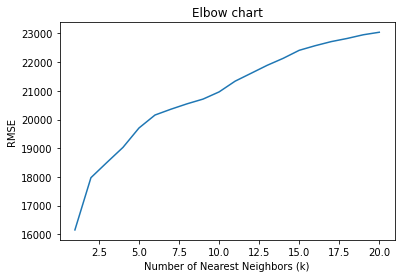

In [83]:
# Develop and display Elbow chart to compare RMSE with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='RMSE')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('RMSE')

plt.title('Elbow chart')
ax.legend().set_visible(False)
plt.show()

In [84]:
nyc_jobs_df.Avarage_Salary.describe()

count      3231.000000
mean      70845.335081
std       42124.154821
min          15.000000
25%       50767.750000
50%       71362.000000
75%       96237.000000
max      257500.000000
Name: Avarage_Salary, dtype: float64

In [85]:
# Develop k-NN regressor model using KNeighborsRegressor()
# function and best number of nearest neighbors, k = 4
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
knn.fit(train_X_s, train_y)

KNeighborsRegressor(n_neighbors=1)

In [86]:
# Make predictions using k-NN model. 
# Use predict() to score (make) predictions for validation set.
knn_valid_pred = knn.predict(valid_X_s)

# Use predict() function to make predictions for
# training set.
knn_train_pred = knn.predict(train_X_s)


c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [87]:
# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set')
regressionSummary(train_y, knn_train_pred)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set')
regressionSummary(valid_y, knn_valid_pred)

Accuracy Measures for Training Set

Regression statistics

                      Mean Error (ME) : -28.5028
       Root Mean Squared Error (RMSE) : 623.5108
            Mean Absolute Error (MAE) : 45.6107
          Mean Percentage Error (MPE) : -0.0456
Mean Absolute Percentage Error (MAPE) : 0.0660

Accuracy Measures for Validation Set

Regression statistics

                      Mean Error (ME) : 429.7857
       Root Mean Squared Error (RMSE) : 16155.1449
            Mean Absolute Error (MAE) : 7505.3063
          Mean Percentage Error (MPE) : -843.8267
Mean Absolute Percentage Error (MAPE) : 852.8523


# 3. Decision Tree

In [88]:
# Re partitioning the data from original dataset for the new model with same random_state = 1 
X = nyc_jobs_df[predictors]
y = nyc_jobs_df[outcome]
encoder1 = ce.BaseNEncoder(cols=['Agency','Posting_Type','Civil_Service_Title','Level','Job_Category',
                                'Full_Time_Part_Time_indicator','Salary_Frequency','Work_Location',
                                'Division_Work_Unit','Preferred_Skills','Residency_Requirement','Career_Level']
                          ,return_df=True,base=12)
X = encoder1.fit_transform(X)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [89]:
# Grid search to find optimized regression tree.

# Start with an initial guess for parameters.
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50],}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() initial parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best initial paramenters of regression tree. 
print(f'Initial score:{gridSearch.best_score_:.4f}')
print('Initial parameters: ', gridSearch.best_params_)

Initial score:0.8789
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


In [90]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(10, 19)), 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003], 
    'min_samples_split': list(range(1, 20)), 
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() new parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=50, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of regression tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.9113
Improved parameters:  {'max_depth': 18, 'min_impurity_decrease': 0.002, 'min_samples_split': 3}


c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1800 fits failed out of a total of 34200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.p

In [95]:
# Create regression tree based on the improved parameters. 
bestRegTree = gridSearch.best_estimator_


In [96]:
# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, bestRegTree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, bestRegTree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1921.6000
            Mean Absolute Error (MAE) : 632.6682
          Mean Percentage Error (MPE) : -0.0719
Mean Absolute Percentage Error (MAPE) : 1.0831

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : 516.9499
       Root Mean Squared Error (RMSE) : 11699.2711
            Mean Absolute Error (MAE) : 5110.7200
          Mean Percentage Error (MPE) : -1.0422
Mean Absolute Percentage Error (MAPE) : 7.6717


# 4. Nurel Network

In [97]:
# Re partitioning the data from original dataset for the new model with same random_state = 1 
X = nyc_jobs_df[predictors]
y = nyc_jobs_df[outcome]
encoder1 = ce.BaseNEncoder(cols=['Agency','Posting_Type','Civil_Service_Title','Level','Job_Category',
                                'Full_Time_Part_Time_indicator','Salary_Frequency','Work_Location',
                                'Division_Work_Unit','Preferred_Skills','Residency_Requirement','Career_Level']
                          ,return_df=True,base=12)
X = encoder1.fit_transform(X)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [98]:
print('Predictors for Training Partition')
print(train_X.head(5))


Predictors for Training Partition
      Agency_0  Agency_1  Posting_Type_0  #_Of_Positions  \
3296         1         7               2               1   
3132         1         2               2               1   
887          0         9               2               1   
1951         0         6               2               1   
3352         0         9               2               1   

      Civil_Service_Title_0  Civil_Service_Title_1  Civil_Service_Title_2  \
3296                      2                      0                      3   
3132                      0                      4                      8   
887                       0                     11                      7   
1951                      0                      2                      2   
3352                      0                      1                      1   

      Level_0  Level_1  Job_Category_0  ...  Work_Location_1  Work_Location_2  \
3296        0        4               0  ...                4 

In [99]:
sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)

# Develop a data frame to display scaled predictors for 
# training partition. Round scaled values to 3 decimals.
# Add coloumn titles to data frame.
train_X_sc_df = np.round(pd.DataFrame(train_X_sc), decimals=3)                            
train_X_sc_df.columns=['Agency_0', 'Agency_1', 'Posting_Type_0', '#_Of_Positions',
       'Civil_Service_Title_0', 'Civil_Service_Title_1',
       'Civil_Service_Title_2', 'Level_0', 'Level_1', 'Job_Category_0',
       'Job_Category_1', 'Full_Time_Part_Time_indicator_0', 'Career_Level_0',
       'Salary_Frequency_0', 'Work_Location_0', 'Work_Location_1',
       'Work_Location_2', 'Division_Work_Unit_0', 'Division_Work_Unit_1',
       'Division_Work_Unit_2', 'Preferred_Skills_0', 'Preferred_Skills_1',
       'Preferred_Skills_2', 'Residency_Requirement_0',
       'Residency_Requirement_1']

# Display scaled predictors for training partition.
print()
print('Scaled Predictors for Training Partition')
print(train_X_sc_df.head(10))


Scaled Predictors for Training Partition
   Agency_0  Agency_1  Posting_Type_0  #_Of_Positions  Civil_Service_Title_0  \
0     0.241     0.404           0.900          -0.140                  5.035   
1     0.241    -1.102           0.900          -0.140                 -0.384   
2    -0.808     1.006           0.900          -0.140                 -0.384   
3    -0.808     0.103           0.900          -0.140                 -0.384   
4    -0.808     1.006           0.900          -0.140                 -0.384   
5    -0.808     0.404          -1.111          -0.035                 -0.384   
6     0.241     1.006           0.900          -0.140                 -0.384   
7    -0.808    -0.500          -1.111          -0.035                 -0.384   
8    -0.808     0.705           0.900          -0.140                 -0.384   
9    -0.808    -0.500          -1.111          -0.035                 -0.384   

   Civil_Service_Title_1  Civil_Service_Title_2  Level_0  Level_1  \
0       

In [100]:
jobs_reg = MLPRegressor(hidden_layer_sizes=(15), max_iter=10000, random_state=1,learning_rate_init = 0.01)
jobs_reg.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Toyota Corolla Neural Network Model')
print(jobs_reg.intercepts_)

print()
print('Network Weights for Toyota Corolla Neural Network Model')
print(jobs_reg.coefs_)


Final Intercepts for Toyota Corolla Neural Network Model
[array([ -9.96205431,   7.28447746,  36.23468392, -21.43556278,
        33.1394153 , -44.72456671,  -3.90351482,  62.67684525,
        15.58717594,  30.48699603, -14.12398789,  37.23656109,
       -64.79574965,  62.94514371,   1.54877954]), array([-98.16153143])]

Network Weights for Toyota Corolla Neural Network Model
[array([[-2.05627155e+01,  3.14462109e+01,  6.83698400e+00,
        -3.49694792e+01,  5.65490198e+01, -2.57366511e+01,
         1.04409835e+01,  2.53015014e+01, -7.31883322e+01,
        -8.81015188e+01,  6.30544576e+01, -1.51441054e+01,
         6.66280466e+01, -3.24444804e+00, -2.80291912e+01],
       [-6.52406678e+00, -7.06330423e+01, -8.19153348e-01,
        -4.75620307e+01, -2.63285625e+01,  8.86648459e+00,
        -1.23040442e+01, -1.64791918e+01,  7.47438206e+00,
         2.98877442e+01,  1.42812168e+01, -2.86389821e+01,
        -2.73925676e+01, -4.28033612e+01,  8.19214140e+00],
       [ 7.52342268e-01, -5.5

In [101]:
# Make 'Price' predictions for validation set using Toyota Corolla 
# neural network model. 

# Use corolla_reg model to predict 'Price' outcome
# for validation set.
salary_pred = np.round(jobs_reg.predict(valid_X_sc), decimals=2)

# Create data frame to display prediction results for
# validation set. 
salary_pred_result = pd.DataFrame({'Actual': valid_y, 
                'Prediction': salary_pred, 'Residual': valid_y-salary_pred})

print('Predictions for Toyota Price for Validation Partition')
print(salary_pred_result.head(10))

Predictions for Toyota Price for Validation Partition
         Actual  Prediction  Residual
1910   67096.00    89119.50 -22023.50
2020   49151.00    53840.71  -4689.71
3394      15.00      -98.16    113.16
2456  119204.00    83695.86  35508.14
2793   62678.00    76144.46 -13466.46
1511   82942.50    77877.98   5064.52
691   112500.00   100734.95  11765.05
3598      20.33      -98.16    118.49
2767  147500.00   158350.01 -10850.01
3522   76090.00    81469.09  -5379.09


In [102]:
# Neural network model accuracy measures for training and
# validation partitions. 

# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, jobs_reg.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, jobs_reg.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -124.7975
       Root Mean Squared Error (RMSE) : 13357.1497
            Mean Absolute Error (MAE) : 9389.2506
          Mean Percentage Error (MPE) : -214.0578
Mean Absolute Percentage Error (MAPE) : 703.8485

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -15.8132
       Root Mean Squared Error (RMSE) : 16520.6981
            Mean Absolute Error (MAE) : 11601.1075
          Mean Percentage Error (MPE) : -88.5346
Mean Absolute Percentage Error (MAPE) : 930.4791


In [103]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(1, 10)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPRegressor( max_iter=10000, random_state=1,learning_rate_init = 0.01), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)


Best score:0.7450
Best parameter:  {'hidden_layer_sizes': 6}


In [104]:
jobs_reg = MLPRegressor(hidden_layer_sizes=(6), max_iter=10000, random_state=1,learning_rate_init = 0.01)
jobs_reg.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Toyota Corolla Neural Network Model')
print(jobs_reg.intercepts_)

print()
print('Network Weights for Toyota Corolla Neural Network Model')
print(jobs_reg.coefs_)

Final Intercepts for Toyota Corolla Neural Network Model
[array([-24.67498182,  17.09387201, 109.91056146, 151.08727605,
       -14.66999992, 166.72335953]), array([175.40123581])]

Network Weights for Toyota Corolla Neural Network Model
[array([[-2.43774057e+01,  2.83537000e+01,  7.29684143e+00,
        -1.42822760e+01, -1.84457432e+01, -7.96948071e+01],
       [-6.63381863e+01,  3.50658200e+01, -6.57798467e+01,
        -5.02969673e+01,  1.57847340e+01,  4.73304574e+01],
       [ 3.35153482e-02,  4.12598745e+00, -2.61479268e+01,
         1.02634314e+01,  8.98572080e-01,  2.91968314e+00],
       [-3.83942162e+01, -1.88793668e+02, -5.84893693e+01,
        -2.01842921e+01, -2.94284455e+01, -1.89024338e+01],
       [ 2.68451861e+00,  3.47195302e+01, -4.67433890e+01,
        -8.17226963e+01,  6.66404453e+00,  6.83813001e+01],
       [-4.45889051e+01,  1.02517797e+02, -1.42253749e+01,
        -1.77692009e+01,  3.86904727e+01,  1.03632534e+00],
       [ 3.38106290e+01,  2.32388942e+01,  2.02

c:\users\gujar\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
# Make 'Price' predictions for validation set using Toyota Corolla 
# neural network model. 

# Use corolla_reg model to predict 'Price' outcome
# for validation set.
salary_pred = np.round(jobs_reg.predict(valid_X_sc), decimals=2)

# Create data frame to display prediction results for
# validation set. 
salary_pred_result = pd.DataFrame({'Actual': valid_y, 
                'Prediction': salary_pred, 'Residual': valid_y-salary_pred})

print('Predictions for Toyota Price for Validation Partition')
print(salary_pred_result.head(10))

Predictions for Toyota Price for Validation Partition
         Actual  Prediction  Residual
1910   67096.00   145124.04 -78028.04
2020   49151.00    58915.33  -9764.33
3394      15.00      175.40   -160.40
2456  119204.00    84346.93  34857.07
2793   62678.00    66567.42  -3889.42
1511   82942.50    88910.41  -5967.91
691   112500.00    93801.56  18698.44
3598      20.33      175.40   -155.07
2767  147500.00   139144.15   8355.85
3522   76090.00    86088.75  -9998.75


In [106]:
# Neural network model accuracy measures for training and
# validation partitions. 

# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, jobs_reg.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, jobs_reg.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

                      Mean Error (ME) : 12.6481
       Root Mean Squared Error (RMSE) : 16772.3246
            Mean Absolute Error (MAE) : 11800.8118
          Mean Percentage Error (MPE) : -257.0385
Mean Absolute Percentage Error (MAPE) : 386.8453

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

                      Mean Error (ME) : 252.2753
       Root Mean Squared Error (RMSE) : 19398.3935
            Mean Absolute Error (MAE) : 13452.2343
          Mean Percentage Error (MPE) : -241.1182
Mean Absolute Percentage Error (MAPE) : 571.9898
